In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import csv
import dateutil
import os
%matplotlib inline

In [2]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score as rs
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV, cross_val_score
# import required for converting multiclass to binary 
from sklearn.preprocessing import LabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
%matplotlib inline
# import Random forest
from sklearn.ensemble import RandomForestClassifier as RFC
# import required packages for plotting the decision tree 
from sklearn.externals.six import StringIO  
from sklearn import tree
from IPython.display import Image  
import pydotplus

In [3]:
puma_05 = pd.read_csv("../data/Cleaned/puma_05.csv")
puma_06 = pd.read_csv("../data/Cleaned/puma_06.csv")
puma_07 = pd.read_csv("../data/Cleaned/puma_07.csv")
puma_08 = pd.read_csv("../data/Cleaned/puma_08.csv")
puma_09 = pd.read_csv("../data/Cleaned/puma_09.csv")
puma_10 = pd.read_csv("../data/Cleaned/puma_10.csv")
puma_11 = pd.read_csv("../data/Cleaned/puma_11.csv")
puma_12 = pd.read_csv("../data/Cleaned/puma_12.csv")
puma_13 = pd.read_csv("../data/Cleaned/puma_13.csv")
puma_14 = pd.read_csv("../data/Cleaned/puma_14.csv")

In [5]:
puma_05.Pov_risk.value_counts()

2.0    15414
0.0     4783
1.0     4503
Name: Pov_risk, dtype: int64

In [6]:
puma_06.Pov_risk.value_counts()

2.0    15600
0.0     4797
1.0     4729
Name: Pov_risk, dtype: int64

In [7]:
puma_07.Pov_risk.value_counts()

2.0    15613
1.0     4809
0.0     4646
Name: Pov_risk, dtype: int64

In [8]:
puma_08.Pov_risk.value_counts()

2.0    15818
0.0     4757
1.0     4691
Name: Pov_risk, dtype: int64

In [9]:
puma_09.Pov_risk.value_counts()

2.0    15697
1.0     5135
0.0     4908
Name: Pov_risk, dtype: int64

In [10]:
puma_10.Pov_risk.value_counts()

2.0    15544
1.0     5500
0.0     5121
Name: Pov_risk, dtype: int64

In [12]:
puma_11.Pov_risk.value_counts()

2.0    15003
1.0     5673
0.0     5364
Name: Pov_risk, dtype: int64

In [13]:
puma_12.Pov_risk.value_counts()

2.0    15433
1.0     5682
0.0     5329
Name: Pov_risk, dtype: int64

In [14]:
puma_14.Pov_risk.value_counts()

2.0    15751
1.0     5672
0.0     5179
Name: Pov_risk, dtype: int64

In [15]:
puma_05.columns

Index(['Unnamed: 0', 'SERIALNO', 'PUMA', 'FICAtax', 'HousingStatus',
       'Childcare', 'AgeCateg_2', 'MOOP', 'WorkExpIndiv', 'NP', 'Ethnicity',
       'HEAP', 'CEO_Threshold', 'SchoolBreakfast', 'AgeCateg_3', 'IncomeTax',
       'CEO_Income', 'CEO_Poverty', 'Boro', 'Housing', 'WIC', 'Commuting',
       'Official_Poverty', 'Povunit', 'AgeCateg_1', 'CitizenStatus',
       'PreTaxIncome', 'WorkersEquiv', 'FoodStamps', 'Official_Threshold',
       'MV', 'SchoolLunch', 'PovunitType', 'EducAttain', 'Threshold1', 'year',
       'unique_key', 'Pov_risk'],
      dtype='object')

In [18]:
puma_05.year.unique()

array([2005])

### Selected features for Decision Trees

In [30]:
features = ['PovunitType','EducAttain',
            'WorkExpIndiv','Povunit','WIC', 'MV', 'NP','Ethnicity',\
            'SchoolBreakfast', 'HousingStatus', 'WorkersEquiv', 'SchoolLunch',\
            'HEAP','AgeCateg_1','AgeCateg_2','AgeCateg_3','MOOP', 'Childcare',\
            'FoodStamps','Commuting', 'Housing', 'year', 'Pov_risk']

In [31]:
data1 = puma_05[features]
data2 = puma_06[features]
data3 = puma_07[features]
data4 = puma_08[features]
data5 = puma_09[features]
data6 = puma_10[features]
data7 = puma_11[features]
data8 = puma_12[features]
data10 = puma_13[features]
data9 = puma_14[features]

In [32]:
all_years = [data1, data2, data3, data4, data5, data6, data7, data8, data9, data10]
df2 = pd.concat(all_years)

In [65]:
df2.shape

(257394, 23)

In [66]:
X = df2.iloc[:,:-1]
Y = df2.iloc[:,-1:]

In [67]:
y = LabelBinarizer()
Y_binary = y.fit_transform(Y)

In [68]:
y.classes_

array([ 0.,  1.,  2.])

In [69]:
# Split the data 
X_train,X_test,y_train,y_test=train_test_split(X, Y_binary, test_size=0.3, random_state=123)

In [72]:
# hype parameter explored is max_depth
AUC=[]
for i in range(2,20,1):
    rf = DTC(max_depth=i, random_state=123)
    rf.fit(X_train, y_train)
    pred=rf.predict(X_test)
    AUC.append(rs(y_test.ravel(),pred.ravel()))

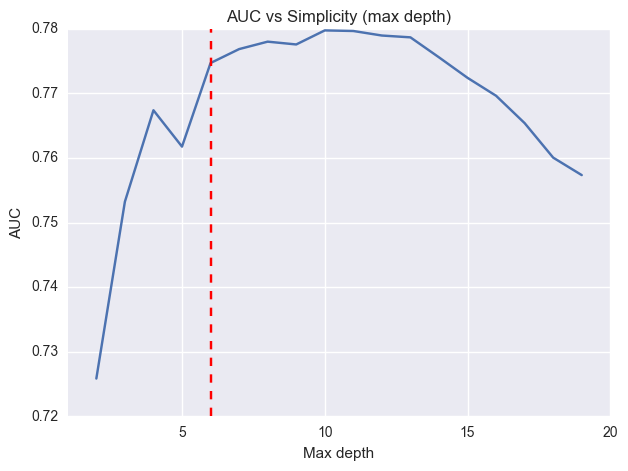

In [73]:
plt.figure(figsize=(7,5))
plt.plot(range(2,20,1),AUC)
plt.xlabel("Max depth")
plt.ylabel("AUC")
plt.title("AUC vs Simplicity (max depth)")
plt.axvline(6,color='r',linestyle='--')
plt.xlim(1,20)
plt.show()

In [74]:
rf1 = DTC(max_depth=6, random_state=123)
rf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best')

In [75]:
rf1.score(X_train,y_train)

0.65517413625641741

In [76]:
rf1.score(X_test,y_test)

0.65261140392908479

In [77]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(rf1.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]
Feature_importance.sort_values(by="importance",ascending=False).iloc[:10,:]

,variables,importance
10,WorkersEquiv,0.404943
11,SchoolLunch,0.139495
16,MOOP,0.12553
1,EducAttain,0.0853386
18,FoodStamps,0.0829888
9,HousingStatus,0.0532969
20,Housing,0.0445876
6,NP,0.0195277
14,AgeCateg_2,0.015587
21,year,0.011017


In [78]:
X_train_simple = X_train.loc[:,['WorkersEquiv','SchoolLunch', 'FoodStamps','EducAttain',\
                                'MOOP', 'HousingStatus', 'Housing', 'year']]
X_test_simple = X_test.loc[:,['WorkersEquiv','SchoolLunch', 'FoodStamps','EducAttain',\
                                'MOOP', 'HousingStatus', 'Housing', 'year']]

In [79]:
rf = DTC(max_depth=6) # Here of course we could remove this limit. But you could have a very 
                             #big graph for next question.
rf.fit(X_train_simple, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [80]:
rf.score(X_train_simple, y_train)

0.66671291799639243

In [81]:
rf.score(X_test_simple, y_test)

0.66320465170489129

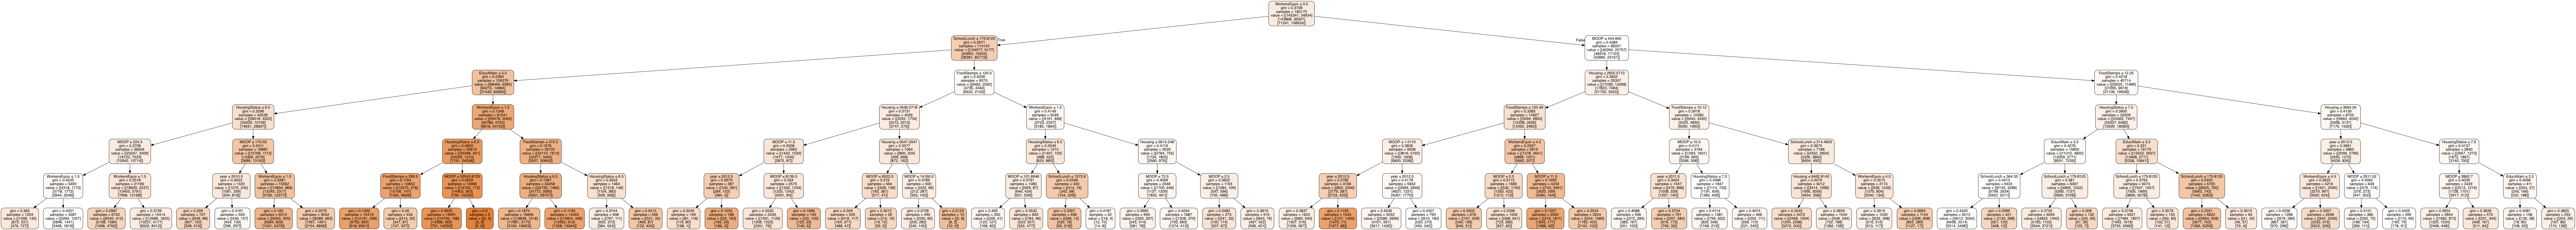

In [84]:
dot_data = StringIO()  

tree.export_graphviz(rf, out_file=dot_data, 
                     feature_names=['WorkersEquiv','SchoolLunch', 'FoodStamps','EducAttain',\
                                'MOOP', 'HousingStatus', 'Housing', 'year'], 
                     class_names=["poor","high risk","not poor"],  
                     filled=True, rounded=True, 
                     special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

In [6]:
X = data1.iloc[:,:-1]
Y = data1.iloc[:,-1:]

In [7]:
y = LabelBinarizer()
Y_binary = y.fit_transform(Y)

In [8]:
y.classes_

array([ 0.,  1.,  2.])

In [9]:
# Split the data 
X_train,X_test,y_train,y_test=train_test_split(X, Y_binary, test_size=0.3, random_state=123)

In [10]:
# hype parameter explored is max_depth
AUC=[]
for i in range(2,20,1):
    rf = DTC(max_leaf_nodes=i, random_state=123)
    rf.fit(X_train, y_train)
    pred=rf.predict(X_test)
    AUC.append(rs(y_test.ravel(),pred.ravel()))

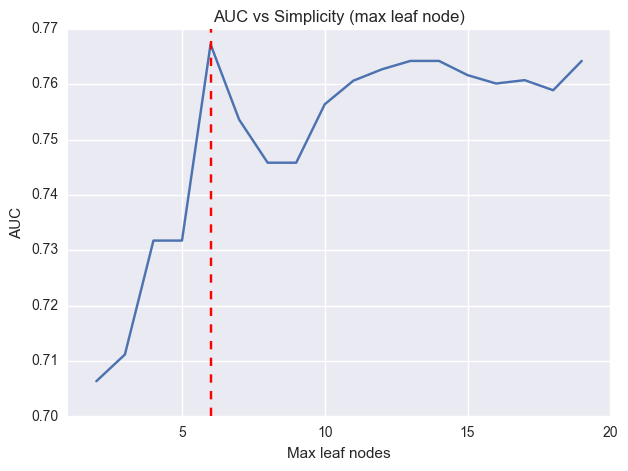

In [11]:
plt.figure(figsize=(7,5))
plt.plot(range(2,20,1),AUC)
plt.xlabel("Max leaf nodes")
plt.ylabel("AUC")
plt.title("AUC vs Simplicity (max leaf node)")
plt.axvline(6,color='r',linestyle='--')
plt.xlim(1,20)
plt.show()

In [12]:
rf1 = DTC(max_leaf_nodes=6, random_state=123)
rf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=6, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [13]:
rf1.score(X_train,y_train)

0.64002313475997685

In [14]:
rf1.score(X_test,y_test)

0.64615384615384619

In [15]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(rf1.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

,variables,importance
10,WorkersEquiv,0.53265
11,SchoolLunch,0.18525
18,FoodStamps,0.154015
1,EducAttain,0.0697792
16,MOOP,0.0583061


In [16]:
X_train_simple = X_train.loc[:,['WorkersEquiv','SchoolLunch', 'FoodStamps','EducAttain',\
                                'MOOP']]
X_test_simple = X_test.loc[:,['WorkersEquiv','SchoolLunch', 'FoodStamps','EducAttain',\
                                'MOOP']]

In [19]:
#real=np.array(y_test.apply(int))
rf = DTC(max_leaf_nodes=6) # Here of course we could remove this limit. But you could have a very 
                             #big graph for next question.
rf.fit(X_train_simple, y_train)
#pred=rf.predict_proba(X_test_simple)[:,1]

#print("The AUC score for this simple model with 5 features is : {}".format(rs(real,pred)))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=6, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

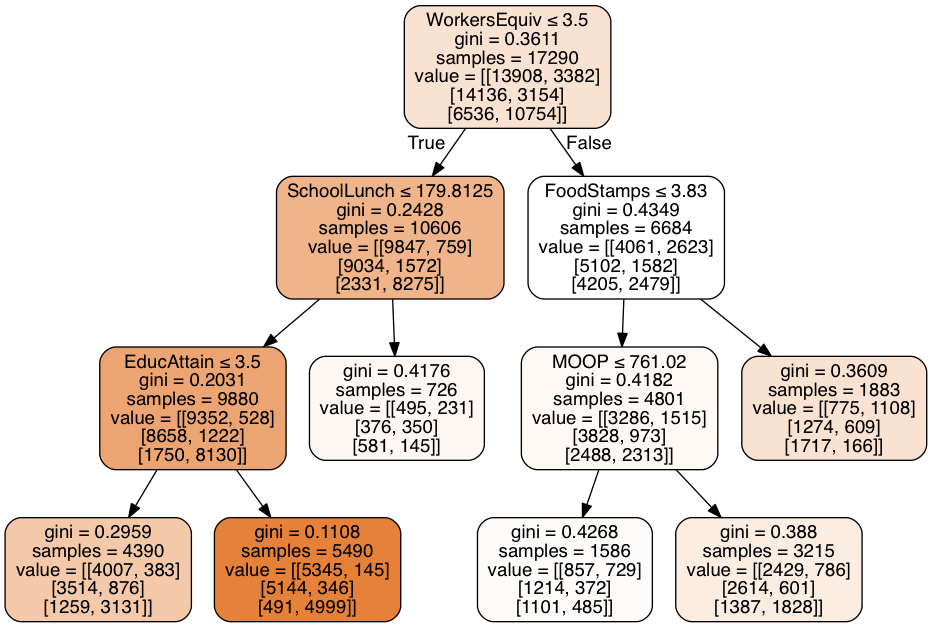

In [20]:
dot_data = StringIO()  

tree.export_graphviz(rf, out_file=dot_data, 
                     feature_names=['WorkersEquiv','SchoolLunch', 'FoodStamps','EducAttain',\
                                'MOOP'], 
                     class_names=["poor","high risk","not poor"],  
                     filled=True, rounded=True, 
                     special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

In [45]:
X = data2.iloc[:,:-1]
Y = data2.iloc[:,-1:]

In [46]:
y = LabelBinarizer()
Y_binary = y.fit_transform(Y)

In [47]:
y.classes_

array([ 0.,  1.,  2.])

In [48]:
# Split the data 
X_train,X_test,y_train,y_test=train_test_split(X, Y_binary, test_size=0.3, random_state=123)

In [49]:
# hype parameter explored is max_depth
AUC=[]
for i in range(2,20,1):
    rf = DTC(max_depth=i, random_state=123)
    rf.fit(X_train, y_train)
    pred=rf.predict(X_test)
    AUC.append(rs(y_test.ravel(),pred.ravel()))

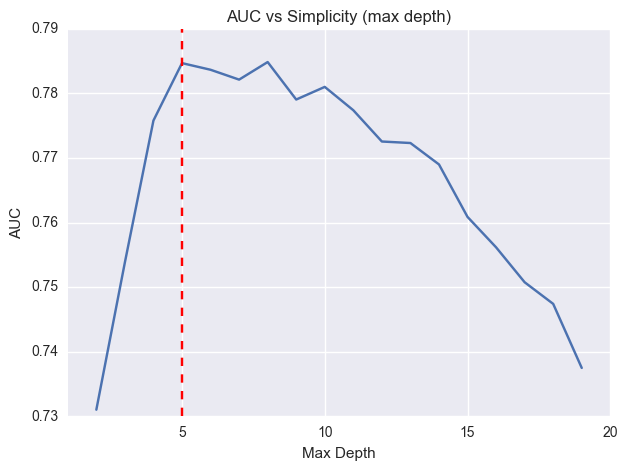

In [51]:
plt.figure(figsize=(7,5))
plt.plot(range(2,20,1),AUC)
plt.xlabel("Max Depth")
plt.ylabel("AUC")
plt.title("AUC vs Simplicity (max depth)")
plt.axvline(5,color='r',linestyle='--')
plt.xlim(1,20)
plt.show()

In [52]:
rf2 = DTC(max_depth=5, random_state=123)
rf2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best')

In [53]:
rf2.score(X_train,y_train)

0.68654764612235619

In [54]:
rf2.score(X_test,y_test)

0.68214380472273817

In [67]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(rf2.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]
Feature_importance.sort_values(by="importance",ascending=False).iloc[:10,:]

,variables,importance
10,WorkersEquiv,0.401408
11,SchoolLunch,0.175448
18,FoodStamps,0.126271
1,EducAttain,0.0949395
9,HousingStatus,0.0785001
20,Housing,0.037647
16,MOOP,0.0375081
13,AgeCateg_1,0.016043
6,NP,0.00868839
7,Ethnicity,0.00843083


In [56]:
X = data3.iloc[:,:-1]
Y = data3.iloc[:,-1:]

In [57]:
y = LabelBinarizer()
Y_binary = y.fit_transform(Y)

In [58]:
y.classes_

array([ 0.,  1.,  2.])

In [59]:
# Split the data 
X_train,X_test,y_train,y_test=train_test_split(X, Y_binary, test_size=0.3, random_state=123)

In [60]:
# hype parameter explored is max_depth
AUC=[]
for i in range(2,20,1):
    rf = DTC(max_depth=i, random_state=123)
    rf.fit(X_train, y_train)
    pred=rf.predict(X_test)
    AUC.append(rs(y_test.ravel(),pred.ravel()))

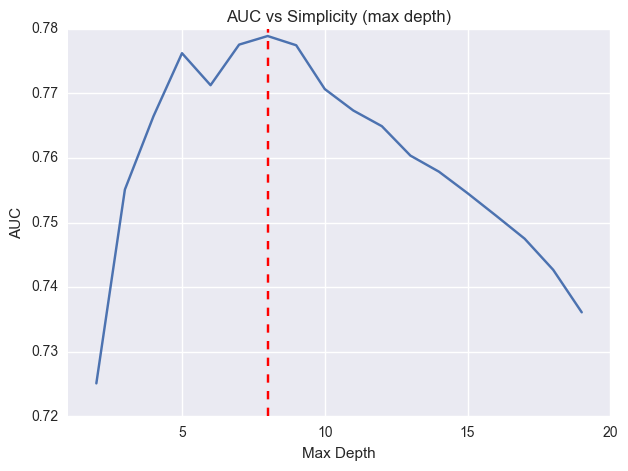

In [61]:
plt.figure(figsize=(7,5))
plt.plot(range(2,20,1),AUC)
plt.xlabel("Max Depth")
plt.ylabel("AUC")
plt.title("AUC vs Simplicity (max depth)")
plt.axvline(8,color='r',linestyle='--')
plt.xlim(1,20)
plt.show()

In [62]:
rf3 = DTC(max_depth=8, random_state=123)
rf3.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best')

In [63]:
rf3.score(X_train,y_train)

0.68211090214851544

In [64]:
rf3.score(X_test,y_test)

0.65496609493418423

In [66]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(rf3.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]
Feature_importance.sort_values(by="importance",ascending=False).iloc[:10,:]

,variables,importance
10,WorkersEquiv,0.320696
11,SchoolLunch,0.142905
18,FoodStamps,0.105299
16,MOOP,0.0961607
1,EducAttain,0.0860091
20,Housing,0.0644867
9,HousingStatus,0.0535288
19,Commuting,0.0226493
12,HEAP,0.0209121
7,Ethnicity,0.0169497


In [68]:
X = data4.iloc[:,:-1]
Y = data4.iloc[:,-1:]

In [69]:
y = LabelBinarizer()
Y_binary = y.fit_transform(Y)

In [70]:
y.classes_

array([ 0.,  1.,  2.])

In [71]:
# Split the data 
X_train,X_test,y_train,y_test=train_test_split(X, Y_binary, test_size=0.3, random_state=123)

In [72]:
# hype parameter explored is max_depth
AUC=[]
for i in range(2,20,1):
    rf = DTC(max_depth=i, random_state=123)
    rf.fit(X_train, y_train)
    pred=rf.predict(X_test)
    AUC.append(rs(y_test.ravel(),pred.ravel()))

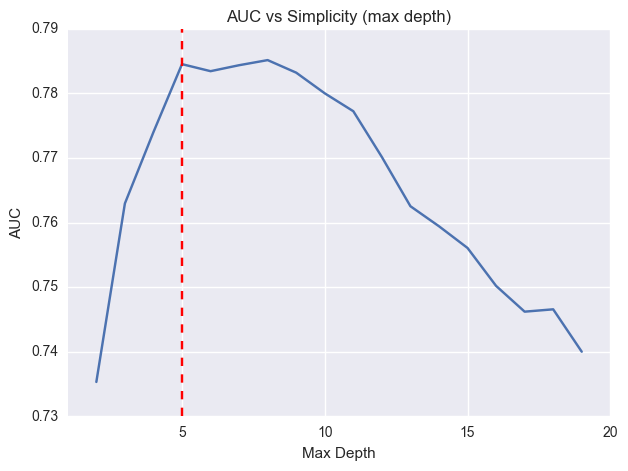

In [74]:
plt.figure(figsize=(7,5))
plt.plot(range(2,20,1),AUC)
plt.xlabel("Max Depth")
plt.ylabel("AUC")
plt.title("AUC vs Simplicity (max depth)")
plt.axvline(5,color='r',linestyle='--')
plt.xlim(1,20)
plt.show()

In [75]:
rf4 = DTC(max_depth=5, random_state=123)
rf4.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best')

In [76]:
rf4.score(X_train,y_train)

0.69970598213276036

In [77]:
rf4.score(X_test,y_test)

0.69234828496042211

In [78]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(rf4.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]
Feature_importance.sort_values(by="importance",ascending=False).iloc[:10,:]

,variables,importance
10,WorkersEquiv,0.416036
11,SchoolLunch,0.170499
18,FoodStamps,0.113983
16,MOOP,0.067799
1,EducAttain,0.0657649
9,HousingStatus,0.0611111
20,Housing,0.0577946
13,AgeCateg_1,0.0139919
12,HEAP,0.0113787
19,Commuting,0.00676285


In [79]:
X = data5.iloc[:,:-1]
Y = data5.iloc[:,-1:]

In [80]:
y = LabelBinarizer()
Y_binary = y.fit_transform(Y)

In [81]:
y.classes_

array([ 0.,  1.,  2.])

In [82]:
# Split the data 
X_train,X_test,y_train,y_test=train_test_split(X, Y_binary, test_size=0.3, random_state=123)

In [83]:
# hype parameter explored is max_depth
AUC=[]
for i in range(2,20,1):
    rf = DTC(max_depth=i, random_state=123)
    rf.fit(X_train, y_train)
    pred=rf.predict(X_test)
    AUC.append(rs(y_test.ravel(),pred.ravel()))

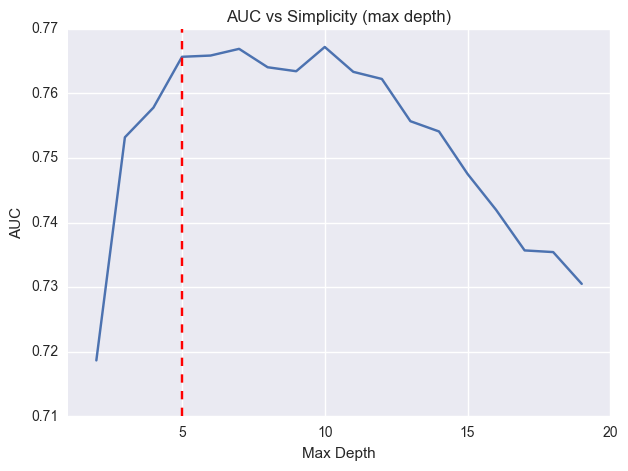

In [86]:
plt.figure(figsize=(7,5))
plt.plot(range(2,20,1),AUC)
plt.xlabel("Max Depth")
plt.ylabel("AUC")
plt.title("AUC vs Simplicity (max depth)")
plt.axvline(5,color='r',linestyle='--')
plt.xlim(1,20)
plt.show()

In [87]:
rf5 = DTC(max_depth=5, random_state=123)
rf5.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best')

In [88]:
rf5.score(X_train,y_train)

0.64341214341214337

In [89]:
rf5.score(X_test,y_test)

0.63196063196063201

In [90]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(rf5.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]
Feature_importance.sort_values(by="importance",ascending=False).iloc[:10,:]

,variables,importance
10,WorkersEquiv,0.415829
18,FoodStamps,0.136383
11,SchoolLunch,0.130016
1,EducAttain,0.102976
9,HousingStatus,0.0805849
20,Housing,0.049145
16,MOOP,0.0419953
13,AgeCateg_1,0.0167774
19,Commuting,0.0163514
7,Ethnicity,0.00541781


In [103]:
X = data6.iloc[:,:-1]
Y = data6.iloc[:,-1:]

In [104]:
y = LabelBinarizer()
Y_binary = y.fit_transform(Y)

In [105]:
y.classes_

array([ 0.,  1.,  2.])

In [106]:
# Split the data 
X_train,X_test,y_train,y_test=train_test_split(X, Y_binary, test_size=0.3, random_state=123)

In [107]:
# hype parameter explored is max_depth
AUC=[]
for i in range(2,20,1):
    rf = DTC(max_depth=i, random_state=123)
    rf.fit(X_train, y_train)
    pred=rf.predict(X_test)
    AUC.append(rs(y_test.ravel(),pred.ravel()))

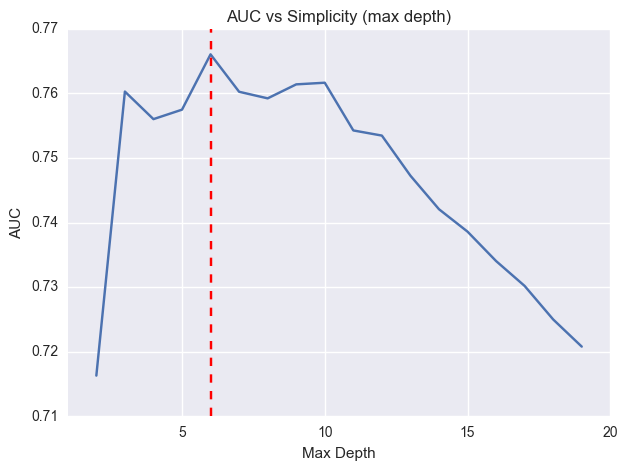

In [110]:
plt.figure(figsize=(7,5))
plt.plot(range(2,20,1),AUC)
plt.xlabel("Max Depth")
plt.ylabel("AUC")
plt.title("AUC vs Simplicity (max depth)")
plt.axvline(6,color='r',linestyle='--')
plt.xlim(1,20)
plt.show()

In [111]:
rf6 = DTC(max_depth=6, random_state=123)
rf6.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best')

In [112]:
rf6.score(X_train,y_train)

0.65132405132405136

In [113]:
rf6.score(X_test,y_test)

0.64101910828025477

In [114]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(rf6.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]
Feature_importance.sort_values(by="importance",ascending=False).iloc[:10,:]

,variables,importance
10,WorkersEquiv,0.415309
11,SchoolLunch,0.127766
18,FoodStamps,0.0986189
1,EducAttain,0.0913454
16,MOOP,0.0684641
20,Housing,0.0607235
9,HousingStatus,0.0577879
13,AgeCateg_1,0.0236795
12,HEAP,0.0184042
15,AgeCateg_3,0.0100899


In [115]:
X = data7.iloc[:,:-1]
Y = data7.iloc[:,-1:]

In [116]:
y = LabelBinarizer()
Y_binary = y.fit_transform(Y)

In [117]:
y.classes_

array([ 0.,  1.,  2.])

In [118]:
# Split the data 
X_train,X_test,y_train,y_test=train_test_split(X, Y_binary, test_size=0.3, random_state=123)

In [119]:
# hype parameter explored is max_depth
AUC=[]
for i in range(2,20,1):
    rf = DTC(max_depth=i, random_state=123)
    rf.fit(X_train, y_train)
    pred=rf.predict(X_test)
    AUC.append(rs(y_test.ravel(),pred.ravel()))

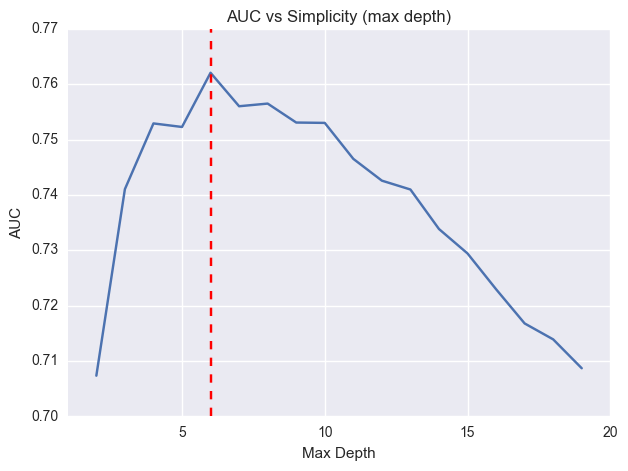

In [120]:
plt.figure(figsize=(7,5))
plt.plot(range(2,20,1),AUC)
plt.xlabel("Max Depth")
plt.ylabel("AUC")
plt.title("AUC vs Simplicity (max depth)")
plt.axvline(6,color='r',linestyle='--')
plt.xlim(1,20)
plt.show()

In [121]:
rf7 = DTC(max_depth=6, random_state=123)
rf7.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best')

In [122]:
rf7.score(X_train,y_train)

0.64581961816984856

In [123]:
rf7.score(X_test,y_test)

0.63760880696364564

In [124]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(rf7.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]
Feature_importance.sort_values(by="importance",ascending=False).iloc[:10,:]

,variables,importance
10,WorkersEquiv,0.39572
11,SchoolLunch,0.1384
18,FoodStamps,0.113769
1,EducAttain,0.0918122
16,MOOP,0.0761751
9,HousingStatus,0.0614679
20,Housing,0.0562303
13,AgeCateg_1,0.0212207
19,Commuting,0.0131317
15,AgeCateg_3,0.0127895


In [125]:
X = data8.iloc[:,:-1]
Y = data8.iloc[:,-1:]

In [126]:
y = LabelBinarizer()
Y_binary = y.fit_transform(Y)

In [127]:
y.classes_

array([ 0.,  1.,  2.])

In [128]:
# Split the data 
X_train,X_test,y_train,y_test=train_test_split(X, Y_binary, test_size=0.3, random_state=123)

In [129]:
# hype parameter explored is max_depth
AUC=[]
for i in range(2,20,1):
    rf = DTC(max_depth=i, random_state=123)
    rf.fit(X_train, y_train)
    pred=rf.predict(X_test)
    AUC.append(rs(y_test.ravel(),pred.ravel()))

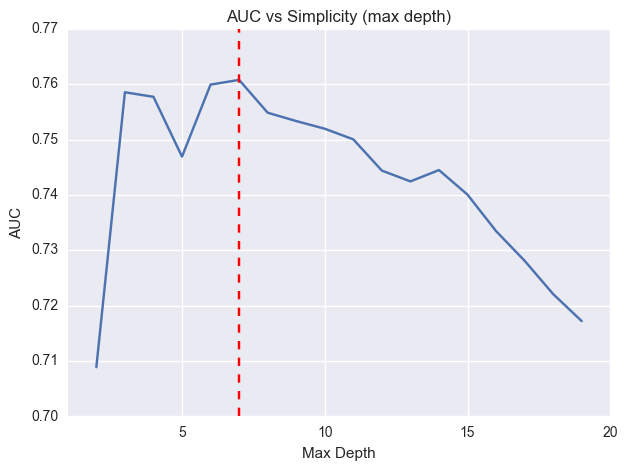

In [131]:
plt.figure(figsize=(7,5))
plt.plot(range(2,20,1),AUC)
plt.xlabel("Max Depth")
plt.ylabel("AUC")
plt.title("AUC vs Simplicity (max depth)")
plt.axvline(7,color='r',linestyle='--')
plt.xlim(1,20)
plt.show()

In [132]:
rf8 = DTC(max_depth=7, random_state=123)
rf8.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best')

In [133]:
rf8.score(X_train,y_train)

0.64867639113992437

In [134]:
rf8.score(X_test,y_test)

0.6314595412150239

In [135]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(rf8.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]
Feature_importance.sort_values(by="importance",ascending=False).iloc[:10,:]

,variables,importance
10,WorkersEquiv,0.364182
11,SchoolLunch,0.138246
18,FoodStamps,0.111577
1,EducAttain,0.107012
16,MOOP,0.0984005
20,Housing,0.0550782
9,HousingStatus,0.0408601
19,Commuting,0.0238388
13,AgeCateg_1,0.0203663
5,MV,0.0139627


In [136]:
X = data9.iloc[:,:-1]
Y = data9.iloc[:,-1:]

In [137]:
y = LabelBinarizer()
Y_binary = y.fit_transform(Y)

In [138]:
y.classes_

array([ 0.,  1.,  2.])

In [139]:
# Split the data 
X_train,X_test,y_train,y_test=train_test_split(X, Y_binary, test_size=0.3, random_state=123)

In [140]:
# hype parameter explored is max_depth
AUC=[]
for i in range(2,20,1):
    rf = DTC(max_depth=i, random_state=123)
    rf.fit(X_train, y_train)
    pred=rf.predict(X_test)
    AUC.append(rs(y_test.ravel(),pred.ravel()))

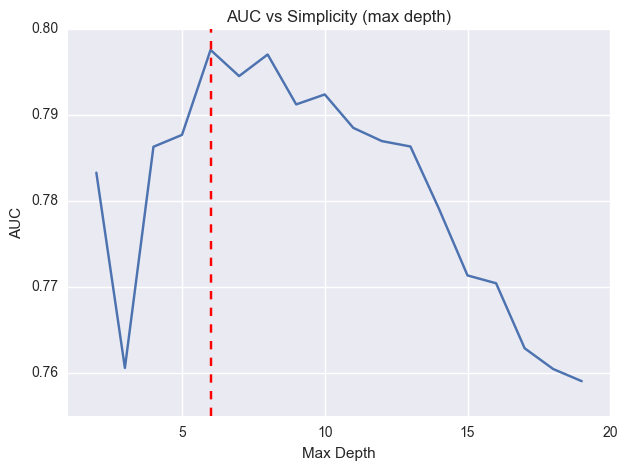

In [142]:
plt.figure(figsize=(7,5))
plt.plot(range(2,20,1),AUC)
plt.xlabel("Max Depth")
plt.ylabel("AUC")
plt.title("AUC vs Simplicity (max depth)")
plt.axvline(6,color='r',linestyle='--')
plt.xlim(1,20)
plt.show()

In [143]:
rf9 = DTC(max_depth=6, random_state=123)
rf9.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best')

In [144]:
rf9.score(X_train,y_train)

0.69491434402019225

In [145]:
rf9.score(X_test,y_test)

0.69126675855155995

In [146]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(rf9.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]
Feature_importance.sort_values(by="importance",ascending=False).iloc[:10,:]

,variables,importance
16,MOOP,0.546287
10,WorkersEquiv,0.104237
1,EducAttain,0.101888
20,Housing,0.0702012
9,HousingStatus,0.0493398
11,SchoolLunch,0.035927
18,FoodStamps,0.0265596
13,AgeCateg_1,0.0206438
12,HEAP,0.0134784
14,AgeCateg_2,0.0134687


In [ ]:
X = data9.iloc[:,:-1]
Y = data9.iloc[:,-1:]

### Selected features for Unspervised Learning

In [21]:
puma_05 = pd.read_csv("../data/Cleaned/puma_05.csv")
puma_06 = pd.read_csv("../data/Cleaned/puma_06.csv")
puma_07 = pd.read_csv("../data/Cleaned/puma_07.csv")
puma_08 = pd.read_csv("../data/Cleaned/puma_08.csv")
puma_09 = pd.read_csv("../data/Cleaned/puma_09.csv")
puma_10 = pd.read_csv("../data/Cleaned/puma_10.csv")
puma_11 = pd.read_csv("../data/Cleaned/puma_11.csv")
puma_12 = pd.read_csv("../data/Cleaned/puma_12.csv")
puma_13 = pd.read_csv("../data/Cleaned/puma_13.csv")
puma_14 = pd.read_csv("../data/Cleaned/puma_14.csv")

In [22]:
puma_05.columns

Index(['Unnamed: 0', 'SERIALNO', 'PUMA', 'FICAtax', 'HousingStatus',
       'Childcare', 'AgeCateg_2', 'MOOP', 'WorkExpIndiv', 'NP', 'Ethnicity',
       'HEAP', 'CEO_Threshold', 'SchoolBreakfast', 'AgeCateg_3', 'IncomeTax',
       'CEO_Income', 'CEO_Poverty', 'Boro', 'Housing', 'WIC', 'Commuting',
       'Official_Poverty', 'Povunit', 'AgeCateg_1', 'CitizenStatus',
       'PreTaxIncome', 'WorkersEquiv', 'FoodStamps', 'Official_Threshold',
       'MV', 'SchoolLunch', 'PovunitType', 'EducAttain', 'Threshold1', 'year',
       'unique_key', 'Pov_risk'],
      dtype='object')

In [23]:
features2 = ['PovunitType','EducAttain',
            'WorkExpIndiv','Povunit','WIC', 'MV', 'NP','Ethnicity',\
            'SchoolBreakfast', 'HousingStatus', 'WorkersEquiv', 'SchoolLunch',\
            'HEAP','AgeCateg_1','AgeCateg_2','AgeCateg_3','MOOP', 'Childcare',\
            'FoodStamps','Commuting', 'Housing','year','PUMA','SERIALNO','Pov_risk']

In [24]:
Data1 = puma_05[features2]
Data2 = puma_06[features2]
Data3 = puma_07[features2]
Data4 = puma_08[features2]
Data5 = puma_09[features2]
Data6 = puma_10[features2]
Data7 = puma_11[features2]
Data8 = puma_12[features2]
Data10 = puma_13[features2]
Data9 = puma_14[features2]

In [25]:
all_years = [Data1, Data2, Data3, Data4, Data5, Data6, Data7, Data8, Data9, Data10]
df = pd.concat(all_years)

In [26]:
df.shape

(257394, 25)

In [27]:
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans,vq
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

In [28]:
X = df.iloc[:,:-3]
len(X)
X.head()

,PovunitType,EducAttain,WorkExpIndiv,Povunit,WIC,MV,NP,Ethnicity,SchoolBreakfast,HousingStatus,...,HEAP,AgeCateg_1,AgeCateg_2,AgeCateg_3,MOOP,Childcare,FoodStamps,Commuting,Housing,year
0,1,4,1,1,0.0,7,3,1,0.0,4,...,0.0,3,3,3,2947.0,0.0,0.00,3171.714,0.000000,2005
1,2,4,2,1,0.0,1,2,3,0.0,4,...,0.0,2,2,2,16.0,0.0,0.00,1823.600,0.000000,2005
2,5,4,1,1,0.0,2,2,3,0.0,9,...,50.0,2,2,2,0.0,0.0,150.32,1383.750,0.000000,2005
3,4,2,3,1,0.0,5,3,4,0.0,1,...,50.0,3,3,3,654.0,0.0,3506.00,90.240,8110.261315,2005
4,3,4,1,1,0.0,1,4,3,0.0,9,...,0.0,4,4,4,35.0,0.0,0.00,7259.200,0.000000,2005


In [29]:
nc = 3
kmeans_cluster = KMeans(n_clusters=nc, random_state=324).fit(X)
centers = kmeans_cluster.cluster_centers_
len(kmeans_cluster.labels_)
df['km_labels'] = kmeans_cluster.labels_

In [159]:
df.Pov_risk.value_counts()

2.0    155542
1.0     51855
0.0     49997
Name: Pov_risk, dtype: int64

In [12]:
X.km_labels.value_counts()

1    184145
2     41871
0     31378
Name: km_labels, dtype: int64

In [165]:
df[df.Pov_risk == 1].PUMA.value_counts()

4103    1500
4112    1489
3710    1469
3705    1469
4101    1452
3801    1389
4017    1386
3709    1351
4009    1300
4110    1208
3809    1198
4008    1186
3707    1161
4014    1138
4001    1117
3708    1101
4016    1084
4015    1069
4007    1053
4102    1043
4003    1040
4002    1036
4018    1028
4012     982
3804     975
4111     973
4010     967
3903     945
4006     945
3702     939
3706     921
3803     912
4105     892
4013     863
3704     841
4107     835
4109     822
4011     793
4106     743
4113     730
4004     717
3802     711
3807     646
3701     645
4108     638
4114     606
4104     603
3902     599
3806     575
3901     550
3703     513
3805     495
4005     464
3810     386
3808     362
Name: PUMA, dtype: int64

In [166]:
high_risk = df[df.Pov_risk == 1]

In [174]:
risk_group = high_risk.SERIALNO.groupby(by = [high_risk['year'],high_risk['PUMA']]).count()

In [175]:
risk_group.head()

year  PUMA
2005  3701     59
      3702     93
      3703     50
      3704     73
      3705    114
Name: SERIALNO, dtype: int64

In [176]:
risk_group.to_csv('risk_group.csv')

In [177]:
poor = df[df.Pov_risk == 0]

In [179]:
poor_gr = poor.SERIALNO.groupby(by = [poor['year'],poor['PUMA']]).count()

In [180]:
poor_gr.head()

year  PUMA
2005  3701     62
      3702     75
      3703     47
      3704     85
      3705    142
Name: SERIALNO, dtype: int64

In [181]:
no_poor = df[df.Pov_risk == 2]

In [182]:
no_poor_gr = no_poor.SERIALNO.groupby(by = [no_poor['year'],no_poor['PUMA']]).count()

In [183]:
no_poor_gr.head()

year  PUMA
2005  3701    228
      3702    251
      3703    243
      3704    238
      3705    145
Name: SERIALNO, dtype: int64

In [184]:
total = df.SERIALNO.groupby(by= [df['year'], df['PUMA']]).count()

In [185]:
total.head()

year  PUMA
2005  3701    349
      3702    419
      3703    340
      3704    396
      3705    401
Name: SERIALNO, dtype: int64

In [186]:
poor_gr.to_csv('poor_gr.csv')
total.to_csv('total.csv')